In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [12]:
data = pd.io.stata.read_stata('data/data.dta', convert_categoricals = False)
df = data.to_csv('data/data.csv')

In [2]:
dtafile = 'data/data.dta'

df = pd.read_stata(dtafile, convert_categoricals = False)
df

,za_nr,doi,version,respid,eastwest,german,ep01,ep03,ep04,ep06,...,xi04,xi05,land,bik,gkpol,xs11,wghtpew,wghtht,wghthew,wghthtew
0,5272,doi:10.4232/1.13325,1.0.0 (2019-08-05),1,1,1,1,2,2,3,...,3,9,90,4,1,2,1.207859,0.870885,1.198172,1.043471
1,5272,doi:10.4232/1.13325,1.0.0 (2019-08-05),2,2,1,2,4,3,3,...,1,3,150,8,6,69,0.544808,0.829881,0.566418,0.470059
2,5272,doi:10.4232/1.13325,1.0.0 (2019-08-05),3,1,1,2,2,3,2,...,5,27,30,9,4,138,1.207859,0.870885,1.198172,1.043471
3,5272,doi:10.4232/1.13325,1.0.0 (2019-08-05),4,2,1,2,2,3,3,...,5,11,120,9,2,74,0.544808,0.829881,0.566418,0.470059
4,5272,doi:10.4232/1.13325,1.0.0 (2019-08-05),5,2,1,3,2,3,2,...,5,12,140,10,7,42,0.544808,0.829881,0.566418,0.470059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,5272,doi:10.4232/1.13325,1.0.0 (2019-08-05),3473,2,1,3,2,3,3,...,1,8,160,3,3,98,0.544808,0.829881,0.566418,0.470059
3473,5272,doi:10.4232/1.13325,1.0.0 (2019-08-05),3474,1,1,2,2,4,3,...,1,4,20,10,7,132,1.207859,0.870885,1.198172,1.043471
3474,5272,doi:10.4232/1.13325,1.0.0 (2019-08-05),3475,1,1,1,1,4,3,...,3,33,90,10,7,121,1.207859,1.741771,1.198172,2.086941
3475,5272,doi:10.4232/1.13325,1.0.0 (2019-08-05),3476,1,1,1,1,4,3,...,5,27,30,9,4,138,1.207859,0.870885,1.198172,1.043471


In [28]:
csvFile = pd.read_csv('data.csv')

In [3]:
def tidy_abortion_df():
    """
    Create dataframe with variables relevant for all hypotheses concerning abortion
    """
    
    # load data
    df = pd.read_stata('data/data.dta', convert_categoricals = False)
    # choose relevant columns / variables  
    abortion_df = df[["sex", "age", "J005", "rd01", "J029"]]
    # remove all values below 0 of abortion response, as negative values indicate not apllicable
    abortion_df = abortion_df[(abortion_df.J005 > 0)]
    # rename columns
    abortion_df = abortion_df. rename(columns = {"J005": "response to abortion", "rd01": "denomination", "J029": "religious assessment"})
    # rename values 
    abortion_df = abortion_df.replace({"sex": {1: "male", 2: "female"},
                                      "denomination": {1: "protestant church (w.o. free church)", 2: "protestant church", 3: "roman catholic church", 4: "other christian religious group", 5: "other non christian religious group", 6: "no religious group", -9: np.nan, -7: np.nan},
                                      "religious assessment": {1: "deeply religious", 2: "very religious", 3: "rather religious", 4: "neither nor", 5: "rather not religious", 6: "not religious", 7: "not religious at all", -13: np.nan, -12: np.nan, -9: np.nan, -8: np.nan}})  
    
    return abortion_df

In [18]:
"""
Create dataframe with variables relevant for all hypotheses concerning abortion
"""

# choose relevant columns / variables  
abortion_df = df[["sex", "age", "J005", "rd01", "J029"]]
# remove all values below 0 of abortion response, as negative values indicate not apllicable
abortion_df = abortion_df[(abortion_df.J005 > 0)]
# rename columns
abortion_df = abortion_df. rename(columns = {"J005": "response to abortion", "rd01": "denomination", "J029": "religious assessment"})

# rename values 
abortion_df = abortion_df.replace({"sex": {1: "male", 2: "female"},
                                  "denomination": {1: "protestant church (w.o. free church)", 2: "protestant church", 3: "roman catholic church", 4: "other christian religious group", 5: "other non christian religious group", 6: "no religious group", -9: np.nan, -7: np.nan},
                                  "religious assessment": {1: "deeply religious", 2: "very religious", 3: "rather religious", 4: "neither nor", 5: "rather not religious", 6: "not religious", 7: "not religious at all", -13: np.nan, -12: np.nan, -9: np.nan, -8: np.nan}})


print(abortion_df)


# summary statistic
summary = abortion_df.describe(include='all')
summary


# df.dropna()

         sex  age  response to abortion                          denomination  \
1     female   64                     4                    no religious group   
5       male   41                     1  protestant church (w.o. free church)   
10      male   37                     4                    no religious group   
11    female   77                     3                 roman catholic church   
13      male   46                     4                    no religious group   
...      ...  ...                   ...                                   ...   
3467  female   60                     3  protestant church (w.o. free church)   
3468  female   69                     4                    no religious group   
3471  female   43                     1                    no religious group   
3472  female   32                     1                    no religious group   
3476    male   88                     3                    no religious group   

      religious assessment 

,sex,age,response to abortion,denomination,religious assessment
count,1570,1570.000000,1570.000000,1569,1533
unique,2,NaN,NaN,6,7
top,male,NaN,NaN,no religious group,not religious at all
freq,792,NaN,NaN,621,461
mean,NaN,51.313376,2.667516,NaN,NaN
std,NaN,17.800570,1.198694,NaN,NaN
min,NaN,18.000000,1.000000,NaN,NaN
25%,NaN,37.000000,1.000000,NaN,NaN
50%,NaN,52.000000,3.000000,NaN,NaN
75%,NaN,65.000000,4.000000,NaN,NaN


In [76]:
# could still add mean and max response of males and females to summarizing df 
# test still missing
def abortion_sex():
    """
    Check for correlation between sex and response to abortion by counting responses
    of males and females and plotting the percentage
    """
    
    print("\n" + '\033[1m' + 'Hypothesis 1: Is there any relation between the response concerning abortion and sex?' + '\033[0m')
    
    # choosing relevant columns
    abortion_df = tidy_abortion_df()
    abse_df = abortion_df[["sex", "response to abortion"]]
        
    # group_by
    abse_group_df = abse_df.groupby(["sex","response to abortion"]).value_counts().reset_index()
    abse_group_df = abse_group_df.rename(columns = {0:"counts"})
    
    # get counts of how many males and how many females 
    quantity = abse_df["sex"].value_counts()
    quantity_males = np.asarray(quantity)[0]
    quantity_females = np.asarray(quantity)[1]
    
    # split df for males and females 
    females_df = abse_group_df[:4]
    males_df = abse_group_df[4:]
    
    # get percentage of male and female counts on response to abortion
    males_df["percentage"] = males_df["counts"]/quantity_males
    females_df["percentage"] = females_df["counts"]/quantity_females
    
    males_percentage = males_df["percentage"].to_numpy()
    females_percentage = females_df["percentage"].to_numpy()
    
    values = males_df["response to abortion"].to_numpy()
    
    # add percentage to grouped df
    abse_group_df = pd.concat([females_df, males_df])
    print("\n Grouped Dataframe: \n\n",abse_group_df, "\n")
    
    
    females_counts = females_df["counts"].to_numpy()
    mean_female_response = females_counts@values / quantity_females
    print("mean female response:", mean_female_response)
    males_counts = males_df["counts"].to_numpy()
    mean_male_response = males_counts@values / quantity_males
    print("mean male response:", mean_male_response)
    
    # line plot for response to abortion of males and females in percentage 
    plt.plot(values, males_percentage, 'o-g')
    plt.plot(values, females_percentage, 'o-b')
    plt.legend(['males', 'females'])
    plt.title("Response to abortion depending on sex in percentage\n")
    plt.xlabel("Response to abortion in numeric values")
    plt.ylabel("percentage")
    plt.xticks(ticks=values, labels=values)
    plt.show()
    
    return 

In [74]:
# could still add mean and max response of males and females to summarizing df 
# test still missing
def abortion_sex():
    """
    Check for correlation between sex and response to abortion by counting responses
    of males and females and plotting the percentage
    """
    
    print("\n" + '\033[1m' + 'Hypothesis 1: Is there any relation between the response concerning abortion and sex?' + '\033[0m')
    
    # choosing relevant columns
    abortion_df = tidy_abortion_df()
    abse_df = abortion_df[["sex", "response to abortion"]]
        
    # group_by
    abse_group_df = abse_df.groupby(["sex","response to abortion"]).value_counts().reset_index()
    abse_group_df = abse_group_df.rename(columns = {0:"counts"})
    
    # get counts of how many males and how many females 
    quantity = abse_df["sex"].value_counts()
    quantity_males = np.asarray(quantity)[0]
    quantity_females = np.asarray(quantity)[1]
    
    # split df for males and females 
    females_df = abse_group_df[:4]
    males_df = abse_group_df[4:]
    
    values = males_df["response to abortion"].to_numpy()
    
    # use function to get percentage, mean and max values respectively 
    females_df, females_percentage, mean_female_response, max_female_response = percentage_mean_max(females_df, quantity_females)
    males_df, males_percentage, mean_male_response, max_male_response = percentage_mean_max(males_df, quantity_males)

    # add percentage to grouped df
    abse_group_df = pd.concat([females_df, males_df])
    print("\n Grouped Dataframe: \n\n",abse_group_df, "\n")
    
    # summary df with mean and max response
    zipped = list(zip(set(abse_df["sex"].to_numpy()), [mean_male_response, mean_female_response], [max_male_response, max_female_response]))
    summary_df = pd.DataFrame(zipped, columns = ["Age", "Mean Response", "Max Response"])
    print("\nSummary:\n\n",summary_df)
    
    # line plot for response to abortion of males and females in percentage 
    plt.plot(values, males_percentage, 'o-g')
    plt.plot(values, females_percentage, 'o-b')
    plt.legend(['males', 'females'])
    plt.title("Response to abortion depending on sex in percentage\n")
    plt.xlabel("Response to abortion in numeric values")
    plt.ylabel("percentage")
    plt.xticks(ticks=values, labels=values)
    plt.show()
    
    return 

In [70]:
# helper function, used for abortion_sex() and abortion_rel()
def percentage_mean_max(df, quantity):
    """
    doc:
    """
    
    df["percentage"] = df["counts"]/quantity
    percentage_arr = df["percentage"].to_numpy()
    mean = df["counts"].to_numpy()@df["response to abortion"].to_numpy()/quantity
    maxval = df["response to abortion"].to_numpy()[df["counts"].to_numpy().argmax()]
    
    return df,percentage_arr, mean, maxval


Hypothesis 1: Is there any relation between the response concerning abortion and sex?

 Grouped Dataframe: 

       sex  response to abortion  counts  percentage
0  female                     1     198    0.254499
1  female                     2     125    0.160668
2  female                     3     169    0.217224
3  female                     4     286    0.367609
4    male                     1     212    0.267677
5    male                     2     120    0.151515
6    male                     3     203    0.256313
7    male                     4     257    0.324495 


Summary:

       Age  Mean Response  Max Response
0    male       2.637626             4
1  female       2.697943             4


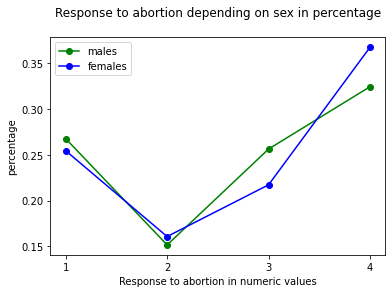

In [75]:
abortion_sex2()


Hypothesis 1: Is there any relation between the response concerning abortion and sex?

 Grouped Dataframe: 

       sex  response to abortion  counts  percentage
0  female                     1     198    0.254499
1  female                     2     125    0.160668
2  female                     3     169    0.217224
3  female                     4     286    0.367609
4    male                     1     212    0.267677
5    male                     2     120    0.151515
6    male                     3     203    0.256313
7    male                     4     257    0.324495 

mean female response: 2.697943444730077
mean male response: 2.6376262626262625


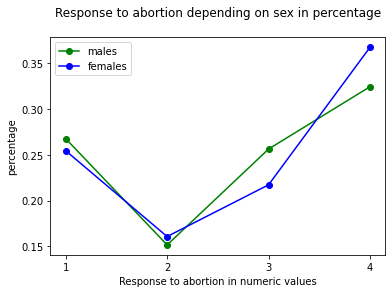

In [77]:
abortion_sex()

      sex  response to abortion  counts  percentage
0  female                     1     198    0.254499
1  female                     2     125    0.160668
2  female                     3     169    0.217224
3  female                     4     286    0.367609
4    male                     1     212    0.267677
5    male                     2     120    0.151515
6    male                     3     203    0.256313
7    male                     4     257    0.324495


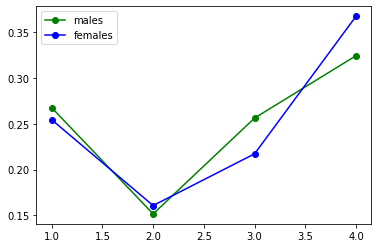

In [19]:
abse_df = abortion_df[["sex", "response to abortion"]]
    
# group_by
abse_group_df = abse_df.groupby(["sex","response to abortion"]).value_counts().reset_index()
abse_group_df = abse_group_df.rename(columns = {0:"counts"})

quantity = abse_df["sex"].value_counts()
quantity_males = np.asarray(quantity)[0]
quantity_females = np.asarray(quantity)[1]

females_df = abse_group_df[:4]
males_df = abse_group_df[4:]

males_df["percentage"] = males_df["counts"]/quantity_males
females_df["percentage"] = females_df["counts"]/quantity_females

males_percentage = males_df["percentage"].to_numpy()
females_percentage = females_df["percentage"].to_numpy()

values = males_df["response to abortion"].to_numpy()

abse_group_df = pd.concat([females_df, males_df])
print(abse_group_df)

# line plot for response to abortion of males and females in percentage 
plt.plot(values, males_percentage, 'o-g')
plt.plot(values, females_percentage, 'o-b')
plt.legend(['males', 'females'])



      sex  J005
1       2     4
5       1     1
10      1     4
11      2     3
13      1     4
...   ...   ...
3467    2     3
3468    2     4
3471    2     1
3472    2     1
3476    1     3

[1570 rows x 2 columns]
   sex  J005  counts
0    1     1     212
1    1     2     120
2    1     3     203
3    1     4     257
4    2     1     198
5    2     2     125
6    2     3     169
7    2     4     286
792
778
   sex  J005  counts  percentage
0    1     1     212    0.267677
1    1     2     120    0.151515
2    1     3     203    0.256313
3    1     4     257    0.324495
4    2     1     198    0.254499
5    2     2     125    0.160668
6    2     3     169    0.217224
7    2     4     286    0.367609


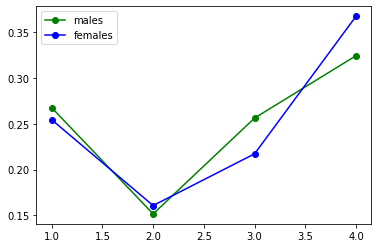

In [20]:
pd.options.mode.chained_assignment = None

"""
Check for correlation between abortion response and sex
"""

small_df = df[["sex","J005"]]
small_df = small_df[(small_df.J005 > 0)]

print(small_df)

group_df = small_df.groupby(["sex","J005"]).value_counts().reset_index()
group_df = group_df.rename(columns = {0:"counts"})
print(group_df)

quantity = small_df["sex"].value_counts()
quantity_males = np.asarray(quantity)[0]
quantity_females = np.asarray(quantity)[1]

print(quantity_males)
print(quantity_females)

males_df = group_df[:4]
females_df = group_df[4:]

males_df["percentage"] = males_df["counts"]/quantity_males
females_df["percentage"] = females_df["counts"]/quantity_females

males_percentage = males_df["percentage"].to_numpy()
females_percentage = females_df["percentage"].to_numpy()

values = males_df["J005"].to_numpy()

plt.plot(values, males_percentage, 'o-g')
plt.plot(values, females_percentage, 'o-b')
plt.legend(['males', 'females'])

abse_group_df = pd.concat([males_df, females_df])
print(group_df)

In [12]:
# Fehlt: test
# Fehlt: plot beschriftung
# Idee: plot mit shared x axis anstat zwei plots komplett individuell 
# könnte man noch machen: die dfs zusammen führen als eins 
# könnte man noch machen: age bins und nochmal alles 
def abortion_age():
    """
    doc:
    """
    
    print("\n" + '\033[1m' + 'Hypothesis 2: Is there a any relation between the response to abortion and the age?' + '\033[0m')
    
    # choose relevant columns and remove rows containing nans
    abortion_df = tidy_abortion_df()
    abag_df = abortion_df[["age", "response to abortion"]]
    abag_df = abag_df.dropna()
    
    # grouped df
    abag_group_df = abag_df.groupby(["age","response to abortion"]).value_counts().reset_index()
    abag_group_df = abag_group_df.rename(columns = {0:"counts"})
    print("\nGrouped Dataframe:\n\n",abag_group_df)
    
    # get mean and max response to abortion from each age group
    counts = abag_group_df['counts'].to_numpy()
    ages = abag_group_df['age'].to_numpy()
    values = abag_group_df['response to abortion'].to_numpy()
    
    individual_ages = set(ages)
    mean_values = []
    max_values = []
    
    for element in individual_ages:
        inter = 0
        counter = 0
        mval = 0
        m = 0
        for i,val in enumerate(ages):
            if val == element:
                inter += values[i]*counts[i]
                counter += counts[i]
                
                if counts[i] > mval:
                    mval = counts[i]
                    m = values[i]
                
        mean_values.append(inter/counter)
        max_values.append(m)
    
    # summary df containing each age group and the mean and max response to abortion
    zipped = list(zip(individual_ages, mean_values, max_values))
    summary_df = pd.DataFrame(zipped, columns = ["Age", "Mean Response", "Max Response"])
    print("\nSummary:\n\n",summary_df)    
    
    # scatterplots for mean and max response
#     plt.scatter(list(individual_ages), mean_values)
#     plt.title("Mean response to abortion of every age")
#     plt.xlabel("ages")
#     plt.ylabel("numeric response to abortion")
#     plt.show()
#     plt.scatter(list(individual_ages), max_values)
#     plt.title("Max response to abortion of every age")
#     plt.xlabel("ages")
#     plt.ylabel("numeric response to abortion")
#     plt.yticks(list(set(max_values)), list(set(max_values)) )
#     plt.show()

#     fig, ax = plt.subplots(2,1, sharex = True)
#     ax[0].scatter(list(individual_ages), mean_values)
#     ax[1].scatter(list(individual_ages), max_values)
#     plt.show()

#     fig = plt.figure
#     ax1 = plt.subplot(211)
#     ax2 = plt.subplot(212, sharex = ax1)
    
#     ax1.scatter(list(individual_ages), mean_values)
#     ax2.scatter(list(individual_ages), max_values)
    
#     plt.show()
    
    fig, (ax1, ax2) = plt.subplots(2)
    ax1.scatter(list(individual_ages), mean_values)
    ax2.scatter(list(individual_ages), max_values)
    
    plt.show()
    
    return 


Hypothesis 2: Is there a any relation between the response to abortion and the age?

Grouped Dataframe:

      age  response to abortion  counts
0     18                     1       1
1     18                     3       6
2     18                     4       8
3     19                     1       6
4     19                     2       2
..   ...                   ...     ...
278   89                     2       1
279   90                     3       1
280   92                     2       2
281   92                     3       2
282   94                     4       1

[283 rows x 3 columns]

Summary:

     Age  Mean Response  Max Response
0    18       3.400000             4
1    19       2.631579             4
2    20       2.312500             1
3    21       3.000000             4
4    22       2.333333             1
..  ...            ...           ...
70   88       2.600000             1
71   89       1.333333             1
72   90       3.000000             3
73   92       2.500

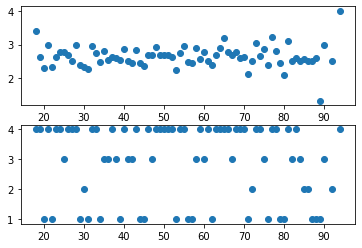

In [13]:
abortion_age()

     age  J005  counts
0     18     1       1
1     18     3       6
2     18     4       8
3     19     1       6
4     19     2       2
..   ...   ...     ...
278   89     2       1
279   90     3       1
280   92     2       2
281   92     3       2
282   94     4       1

[283 rows x 3 columns]
    Age  Mean Response  Max Response
0    18       3.400000             4
1    19       2.631579             4
2    20       2.312500             1
3    21       3.000000             4
4    22       2.333333             1
..  ...            ...           ...
70   88       2.600000             1
71   89       1.333333             1
72   90       3.000000             3
73   92       2.500000             2
74   94       4.000000             4

[75 rows x 3 columns]


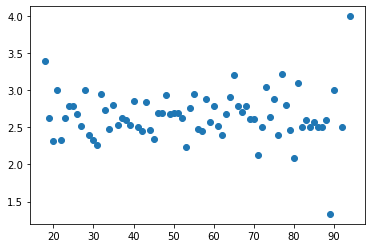

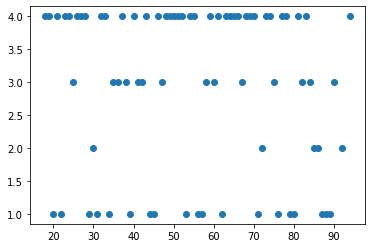

In [6]:
"""
Check for correlation between response to abortion and age using mean and max response.
No correlation found (according to scatterplot)
"""

new_df = df[["age","J005"]]
new_df = new_df[(new_df.J005 > 0)]

group_df = new_df.groupby(["age","J005"]).value_counts().reset_index()
group_df = group_df.rename(columns = {0:"counts"})
print(group_df)

counts = group_df['counts'].to_numpy()
ages = group_df['age'].to_numpy()
values = group_df['J005'].to_numpy()

individual_ages = set(ages)
mean_values = []
max_values = []

for element in individual_ages:
    inter = 0
    counter = 0
    mval = 0
    m = 0
    for i,val in enumerate(ages):
        if val == element:
            inter += values[i]*counts[i]
            counter += counts[i]
            
            if counts[i] > mval:
                mval = counts[i]
                m = values[i]
            
    mean_values.append(inter/counter)
    max_values.append(m)


zipped = list(zip(individual_ages, mean_values, max_values))
summary_df = pd.DataFrame(zipped, columns = ["Age", "Mean Response", "Max Response"])
print(summary_df)    
    
plt.scatter(list(individual_ages), mean_values)
plt.show()
plt.scatter(list(individual_ages), max_values)
plt.show()



In [84]:
def abortion_rel():
    """
    doc:
    """
    
    print("\n" + '\033[1m' + 'Hypothesis 3: Is there any relation between the response to abortion and christian religious assessment?' + '\033[0m')
    
    # choose relevant columns and drop nan rows 
    abortion_df = tidy_abortion_df()
    abre_df = abortion_df[["response to abortion", "denomination", "religious assessment"]]
    abre_df = abre_df.dropna()
    # also drop rows on two other conditions
    abre_df = abre_df[(abre_df["denomination"] != "other non christian religious group") & (abre_df["religious assessment"] != "neither nor" )]
    
    # merge some values 
    abre_df["religious assessment"] = abre_df["religious assessment"].replace(["deeply religious", "very religious", "rather religious"],"religious").replace(["rather not religious", "not religious", "not religious at all"], "not religious")
    abre_df["denomination"] = abre_df["denomination"].replace(["protestant church (w.o. free church)", "protestant church", "roman catholic church", "other christian religious group"],"christian")
    
    # drop combination of religious self assessment and no religious denomination
    index_names = abre_df[(abre_df["religious assessment"] == "religious") & (abre_df["denomination"] == "no religious group")].index
    abre_df.drop(index_names, inplace = True)
    
    # groupby
    abre_group_df = abre_df[["religious assessment", "response to abortion"]].groupby(["religious assessment", "response to abortion"]).value_counts().reset_index()
    abre_group_df = abre_group_df.rename(columns = {0:"counts"})   
    
    # get amount of religious and not religious people
    quantity = abre_df["religious assessment"].value_counts()
    quantity_nr = np.asarray(quantity)[0]
    quantity_r = np.asarray(quantity)[1]
    
    # split df into two for religious and not religious respectively
    nr_df = abre_group_df[:4]
    r_df = abre_group_df[4:]
    
    # response values (1 to 4)
    values = nr_df["response to abortion"].to_numpy()
    
    # use function to get percentage, mean and max response respectively
    nr_df, nr_percentage, mean_nr_response, max_nr_response = percentage_mean_max(nr_df, quantity_nr)
    r_df, r_percentage, mean_r_response, max_r_response = percentage_mean_max(r_df, quantity_r)
    
    # add percentage to grouped df
    abre_group_df = pd.concat([nr_df, r_df])
    print("\nGrouped Dataframe:\n\n",abre_group_df)
    
    # summray df with mean and max repsonse
    zipped = list(zip(set(abre_df["religious assessment"].to_numpy()), [mean_r_response, mean_nr_response], [max_r_response, max_nr_response]))
    summary_df = pd.DataFrame(zipped, columns = ["Religiuousness", "Mean Response", "Max Response"])
    print("\nSummary:\n\n",summary_df)
    
    # line plot 
    plt.plot(values, nr_percentage, 'o-g')
    plt.plot(values, r_percentage, 'o-b')
    plt.legend(['not religious', 'religious'])
    plt.title("Response to abortion depending on religious self assessemnt in percentage\n")
    plt.xlabel("Response to abortion in numeric values")
    plt.ylabel("percentage")
    plt.xticks(ticks=values, labels=values)
    plt.show()
    
    return 
    


Hypothesis 3: Is there any relation between the response to abortion and christian religious assessment?

Grouped Dataframe:

   religious assessment  response to abortion  counts  percentage
0        not religious                     1     167    0.201205
1        not religious                     2      94    0.113253
2        not religious                     3     189    0.227711
3        not religious                     4     380    0.457831
4            religious                     1     150    0.349650
5            religious                     2      98    0.228438
6            religious                     3     100    0.233100
7            religious                     4      81    0.188811

Summary:

   Religiuousness  Mean Response  Max Response
0      religious       2.261072             1
1  not religious       2.942169             4


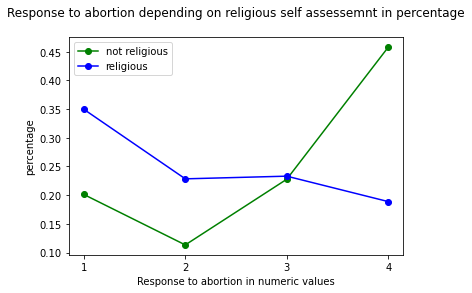

In [85]:
abortion_rel()

     Einschätzung  Abtreibung  counts
0  nicht religiös           1     167
1  nicht religiös           2      94
2  nicht religiös           3     189
3  nicht religiös           4     380
4        religiös           1     150
5        religiös           2      98
6        religiös           3     100
7        religiös           4      81
     Einschätzung  Abtreibung  counts  percentage
0  nicht religiös           1     167    0.201205
1  nicht religiös           2      94    0.113253
2  nicht religiös           3     189    0.227711
3  nicht religiös           4     380    0.457831
4        religiös           1     150    0.349650
5        religiös           2      98    0.228438
6        religiös           3     100    0.233100
7        religiös           4      81    0.188811


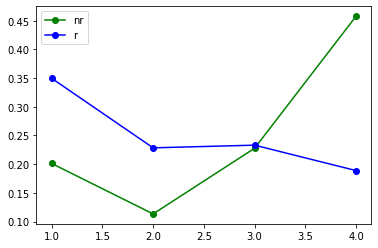

In [5]:
"""
Check for abortion response in relation to religion
"""

reli_df = df[["J029","rd01", "J005"]]

# !!! muss anders gehen, also zusammen irgendwie 
reli_df = reli_df[(reli_df.J005 > 0)]
reli_df = reli_df[(reli_df.rd01 > 0)]
reli_df = reli_df[(reli_df.rd01 != 5)]
reli_df = reli_df[(reli_df.J029 > 0)]
reli_df = reli_df[(reli_df.J029 != 4)]

reli_df = reli_df.rename(columns = {"J029":"Einschätzung", "rd01": "Konfession", "J005": "Abtreibung"})

reli_df["Einschätzung"] = reli_df["Einschätzung"].replace([1,2,3],"religiös").replace([5,6,7], "nicht religiös")
reli_df["Konfession"] = reli_df["Konfession"].replace([1,2,3,4],"christlich").replace(6, "keine Religion")

# df['column name'] = df['column name'].replace(['1st old value','2nd old value',...],'new value')

#groupreli_df = reli_df.groupby(["Einschätzung","Konfession"]).value_counts().reset_index()

index_names = reli_df[(reli_df["Einschätzung"] == "religiös") & (reli_df["Konfession"] == "keine Religion")].index
reli_df.drop(index_names, inplace = True)

group_df = reli_df[["Einschätzung", "Abtreibung"]].groupby(["Einschätzung", "Abtreibung"]).value_counts().reset_index()
group_df = group_df.rename(columns = {0:"counts"})
print(group_df)

quantity = reli_df["Einschätzung"].value_counts()
quantity_nr = np.asarray(quantity)[0]
quantity_r = np.asarray(quantity)[1]

nr_df = group_df[:4]
r_df = group_df[4:]

nr_df["percentage"] = nr_df["counts"]/quantity_nr
r_df["percentage"] = r_df["counts"]/quantity_r

nr_percentage = nr_df["percentage"].to_numpy()
r_percentage = r_df["percentage"].to_numpy()

values = nr_df["Abtreibung"].to_numpy()

group_df = pd.concat([nr_df, r_df])
print(group_df)

plt.plot(values, nr_percentage, 'o-g')
plt.plot(values, r_percentage, 'o-b')
plt.legend(['nr', 'r'])
